# Machine Learning Tutorial

- References
    - 張鈞閔, [Hands-On Tutorial of Machine Learning in Python](https://github.com/twcmchang/hands-on-ML/blob/master/Hands-on%20Tutorial%20of%20Machine%20Learning%20in%20Python.pdf), 中央研究院資訊科學所, 2017.9.19
    - 機器學習發展歷史回顧：https://kknews.cc/tech/n389r88.html
    - Vikram Kamath, [Introduction to Machine Learning](https://in.pycon.org/2011/static/files/talks/11/Introduction_To_ML_Partial_2.pdf), 2011
    - Pedro Domingos, [A Few Useful Things to Know about Machine Learning](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf), University of Washington
    - 林軒田, [Machine Learning Foundations](https://www.youtube.com/playlist?list=PLXVfgk9fNX2I7tB6oIINGBmW50rrmFTqf) (online course on youtube)
    - 李宏毅, [Machine Learning](https://www.youtube.com/playlist?list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49) and [Next Step of Machine Learning](https://www.youtube.com/playlist?list=PLJV_el3uVTsOK_ZK5L0Iv_EQoL1JefRL4) (online course on youtube)
    - 陳縕儂，[Applied Deep Learning](https://www.csie.ntu.edu.tw/~miulab/s108-adl/syllabus), 2019

## Regression
* Polynomial Regression
* LASSO regression
* Ridge regression
* Logistic regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
      'figure.figsize': (12, 6),
      'axes.labelsize': 'x-large',
      'axes.titlesize': 'x-large',
      'xtick.labelsize': 'x-large',
      'ytick.labelsize': 'x-large'}
plt.rcParams.update(params)

%matplotlib inline

### Example 1: Polynomial Regression

In [ ]:
np.random.seed(100)

x = np.array([i * np.pi / 180 for i in range(60, 300, 4)])
y = np.sin(x) + np.random.normal(0, 0.15, len(x))
data = pd.DataFrame(np.column_stack([x, y]), columns = ['x', 'y'])

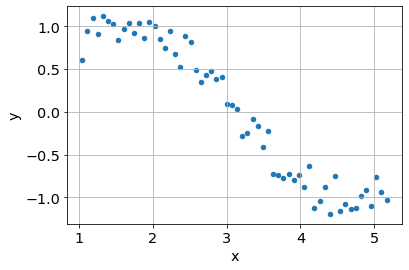

In [ ]:
data.plot.scatter(x = "x", y = "y", grid = True)

In [ ]:
for i in range(2, 16):
    data["x^{}".format(i)] = data['x'] ** i
data.head()

,x,y,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10,x^11,x^12,x^13,x^14,x^15
0,1.047198,0.603561,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,0.950196,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,1.100139,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,0.913191,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,1.117494,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

def example_regression(data, power, plot_dict, reg_type, alpha = 0):
    
    type_dict = {"Linear" : LinearRegression(normalize = True),
            "Lasso" : Lasso(alpha = alpha, normalize = True),
            "Ridge" : Ridge(alpha = alpha, normalize = True)}
    
    basis_functions = ["x"]
    if power >= 2:
        basis_functions.extend(["x^{}".format(i) for i in range(2, power + 1)])
    
    if reg_type in type_dict:
        model = type_dict[reg_type]

    model.fit(data[basis_functions], data["y"])
    y_pred = model.predict(data[basis_functions])
    
    if power in plot_dict:
        plt.subplot(plot_dict[power])
        plt.tight_layout()
        plt.plot(data["x"], data["y"], '.')
        plt.plot(data["x"], y_pred)
        plt.title('Power: {}'.format(power))
    
    rss = sum((y_pred - data["y"]) ** 2)
    ret = [rss]
    ret.extend([model.intercept_])
    ret.extend(model.coef_)
    return ret

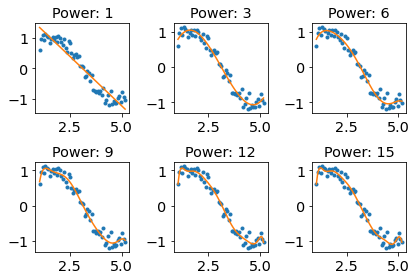

In [ ]:
col = ['rss', 'intercept'] + ['coef_x_{}'.format(i) for i in range(1, 16)]
ind = ['degree: {0}'.format(i) for i in range(1, 16)]

perf_Linear = pd.DataFrame(index = ind, columns = col)
plot_dict = {1 : 231, 3 : 232, 6 : 233, 9 : 234, 12 : 235, 15 : 236}

for i in range(1, 16):
    perf_Linear.iloc[i - 1, 0 : i + 2] = example_regression(data, power = i, plot_dict = plot_dict, reg_type = 'Linear')

In [ ]:
pd.options.display.float_format = '{:,.2g}'.format
perf_Linear

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
degree: 1,3.7,2,-0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 2,3.7,1.9,-0.54,-0.017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 3,1.1,-1.4,3.4,-1.4,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 4,1.1,-1.1,2.9,-1.1,0.087,0.0051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 5,1,0.7,-0.86,1.8,-0.97,0.18,-0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 6,1,-6.1,16,-15,7.4,-2,0.28,-0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 7,0.98,-19,54,-61,36,-13,2.5,-0.26,0.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 8,0.94,-66,2.1e+02,-2.9e+02,2.1e+02,-93,26,-4.2,0.39,-0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 9,0.94,-70,2.3e+02,-3.1e+02,2.4e+02,-1.1e+02,31,-5.5,0.57,-0.03,0.00054,NaN,NaN,NaN,NaN,NaN,NaN
degree: 10,0.88,-4.6e+02,1.9e+03,-3.4e+03,3.5e+03,-2.3e+03,9.9e+02,-2.9e+02,57,-7.3,0.53,-0.017,NaN,NaN,NaN,NaN,NaN


### Example 2: Ridge Regression

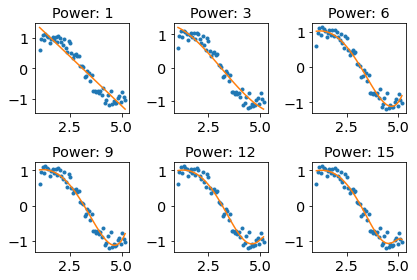

In [ ]:
perf_Ridge = pd.DataFrame(index = ind, columns = col)

for i in range(1, 16):
    perf_Ridge.iloc[i - 1,0 : i + 2] = example_regression(data, power = i, plot_dict = plot_dict, reg_type = 'Ridge', alpha = 1e-3)

In [ ]:
perf_Ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
degree: 1,3.7,2,-0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 2,3.7,1.8,-0.53,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 3,2.7,1.3,0.24,-0.31,0.032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 4,1.6,0.71,0.68,-0.28,-0.03,0.0091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 5,1.3,0.61,0.63,-0.19,-0.034,-0.00049,0.0015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 6,1.3,0.68,0.5,-0.15,-0.028,-0.002,0.0004,0.00019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 7,1.3,0.73,0.44,-0.14,-0.025,-0.0018,0.00022,0.0001,1.8e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 8,1.3,0.74,0.43,-0.14,-0.024,-0.0018,0.00022,9.9e-05,1.7e-05,3.3e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 9,1.3,0.72,0.45,-0.14,-0.025,-0.002,0.00019,0.0001,2.1e-05,2e-06,-4.2e-07,NaN,NaN,NaN,NaN,NaN,NaN
degree: 10,1.2,0.69,0.47,-0.13,-0.026,-0.0024,0.00012,0.0001,2.4e-05,3.6e-06,1.3e-07,-1.4e-07,NaN,NaN,NaN,NaN,NaN


### Example 3: LASSO Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006863686173279593, tolerance: 0.004034598727546797
  positive)


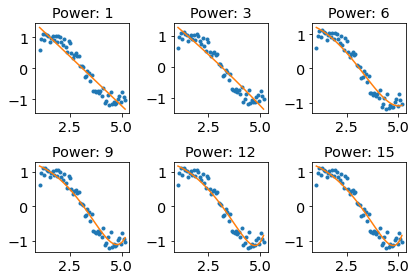

In [ ]:
col = ['rss', 'intercept'] + ['coef_x_{}'.format(i) for i in range(1, 16)]
ind = ['degree: {}'.format(i) for i in range(1, 16)]

perf_Lasso = pd.DataFrame(index = ind, columns = col)

plot_dict = {1 : 231, 3 : 232, 6 : 233, 9 : 234, 12 : 235, 15 : 236}

for i in range(1,16):
    perf_Lasso.iloc[i - 1, 0 : i + 2] = example_regression(data, power = i, plot_dict = plot_dict, reg_type = 'Lasso', alpha = 1e-3)

In [ ]:
perf_Lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
degree: 1,3.7,2,-0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 2,3.7,1.9,-0.54,-0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 3,3.7,1.9,-0.54,-0.016,-0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 4,3.1,1.5,-0.2,-0.11,-0,0.0015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 5,2.4,1.4,-0,-0.15,-0,0,0.00042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 6,2.2,1.4,-0,-0.15,-0,-0,0,7.8e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 7,2,1.3,-0,-0.13,-0.0025,-0,-0,0,1.6e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 8,1.9,1.3,-0,-0.12,-0.0043,-0,-0,0,0,3.1e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 9,1.8,1.3,-0,-0.12,-0.0044,-0,-0,0,0,0,5.9e-07,NaN,NaN,NaN,NaN,NaN,NaN
degree: 10,1.9,1.3,-0,-0.12,-0.0025,-0,-0,0,0,0,0,1.1e-07,NaN,NaN,NaN,NaN,NaN


### Example 4: Logistic Regression

In [ ]:
from sklearn import linear_model, datasets

iris = datasets.load_iris() # https://en.wikipedia.org/wiki/Iris_(plant)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
X = iris.data[:, :2]  # We only take the first two features.
y = iris.target

'''please change the value of C to observe the results'''
logreg = linear_model.LogisticRegression(C = 1e5)

result = logreg.fit(X, y)

In [ ]:
%%capture

!pip install mlxtend

from mlxtend.plotting import plot_decision_regions

plt.figure()
plot_decision_regions(X, y, result)
plt.scatter(X[:, 0], X[:, 1], c = y, edgecolors = 'k', cmap = plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

## Support Vector Machine (SVM)
- References
    - https://www.csie.ntu.edu.tw/~cjlin/libsvm/

### Example: Linearly Separable Case

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.60)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


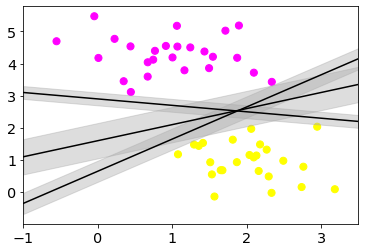

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'spring')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none', color = '#AAAAAA', alpha = 0.4)

plt.xlim(-1, 3.5);

In [ ]:
from sklearn.svm import SVC  # Support Vector Classifier

clf = SVC(kernel = 'linear')
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
def plot_svc_decision_function(clf, ax = None):
    
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])

    ax.contour(X, Y, P, colors = 'k',
               levels = [-1, 0, 1], alpha = 0.5,
               linestyles = ['--', '-', '--'])

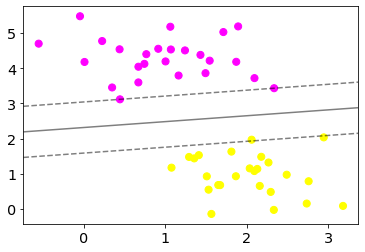

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'spring')
plot_svc_decision_function(clf)

### Example: Nonseparability

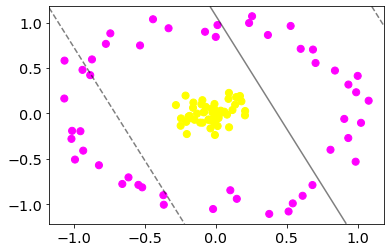

In [ ]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(100, factor =.1, noise = .1)

clf = SVC(kernel = 'linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'spring')
plot_svc_decision_function(clf);

In [ ]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

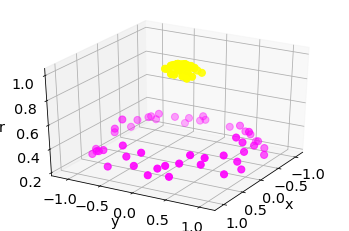

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev = 30, azim = 30):
    
    ax = plt.subplot(projection = '3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c = y, s = 50, cmap = 'spring')
    ax.view_init(elev = elev, azim = azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D()

(-1.171999581408961,
 1.1819988564852166,
 -1.2125659601797725,
 1.1777960890717363)

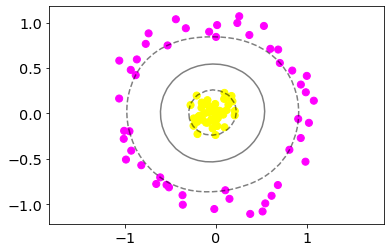

In [ ]:
clf = SVC(kernel = 'rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s = 200, facecolors = 'none');
plt.axis('equal')

## Decision Tree & Random Forest
- We follow this notebook: https://github.com/twcmchang/hands-on-ML/blob/master/example/05_decision_tree.ipynb
    - A good explanation: https://victorzhou.com/blog/information-gain/
- Glossary
    - Information gain: https://en.wikipedia.org/wiki/Information_gain_in_decision_trees 
    - Gini impurity: https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
- Random Forest: https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
- References
    - https://scikit-learn.org/stable/modules/tree.html
    - https://github.com/parrt/dtreeviz/tree/master/notebooks
    - https://github.com/twcmchang/hands-on-ML/blob/master/example/06_gradient_boosting_regression.ipynb
    - <a href = "https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-ensemble-learning%E4%B9%8Bbagging-boosting%E5%92%8Cadaboost-af031229ebc3">機器學習: Ensemble learning之Bagging、Boosting和AdaBoost</a>
    - Importance plot: https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
    - Ensemble learning: https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

## Principal Component Analysis (PCA)
* Illustration for principal component analysis: http://setosa.io/ev/principal-component-analysis/
    * PCA is widely used for dimensionality reduction, as the first step of data analyses.
    * PCA could be done by the singular value decomposition (SVD): https://en.wikipedia.org/wiki/Singular_value_decomposition

<center>
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Singular-Value-Decomposition.svg/440px-Singular-Value-Decomposition.svg.png" width = 400px/img>
</center>

* You could follow this notebook to see how to use the APIs: https://github.com/twcmchang/hands-on-ML/blob/master/example/07_PCA.ipynb

## Clustering: K-Means
- You could follow the notebook: https://github.com/twcmchang/hands-on-ML/blob/master/example/08_kmeans_clustering.ipynb
- References
    - https://github.com/twcmchang/hands-on-ML/blob/master/exercise/ex06_kmeans_clustering_color_compression.ipynb
    - https://www.datacamp.com/community/tutorials/k-means-clustering-python

In [ ]:
!wget https://www.regent-holidays.co.uk/upload-files/product-tours-days/DAY-ITN_TAI_001_4005.jpg

--2021-06-18 13:55:41--  https://www.regent-holidays.co.uk/upload-files/product-tours-days/DAY-ITN_TAI_001_4005.jpg
Resolving www.regent-holidays.co.uk (www.regent-holidays.co.uk)... 178.238.135.86
Connecting to www.regent-holidays.co.uk (www.regent-holidays.co.uk)|178.238.135.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79308 (77K) [image/jpeg]
Saving to: ‘DAY-ITN_TAI_001_4005.jpg’

DAY-ITN_TAI_001_400 100%[===================>]  77.45K   155KB/s    in 0.5s    

2021-06-18 13:55:43 (155 KB/s) - ‘DAY-ITN_TAI_001_4005.jpg’ saved [79308/79308]



In [ ]:
import matplotlib.image as mpimg
import matplotlib.pylab as plt

taipei101 = mpimg.imread("./DAY-ITN_TAI_001_4005.jpg")

Text(0.5, 1.0, '128 colors')

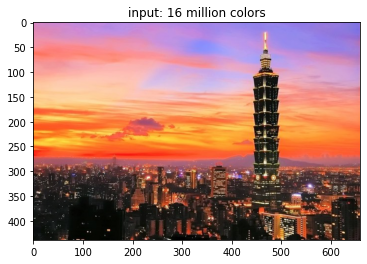

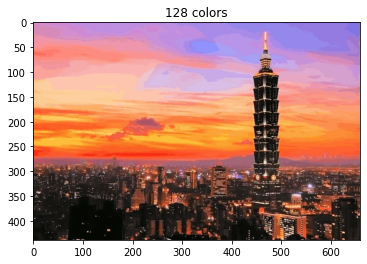

In [ ]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np
# https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html

n_colors = 128
X = (taipei101 / 255.0).reshape(-1, 3)

model = MiniBatchKMeans(n_colors)
model.fit(X)
labels = model.predict(X)

colors = model.cluster_centers_
approx = colors[labels].reshape(taipei101.shape)
approx = (255 * approx).astype(np.uint8)

plt.figure()
plt.imshow(taipei101)
plt.title('input: 16 million colors')

plt.figure()
plt.imshow(approx)
plt.title('{0} colors'.format(n_colors))

## Reinforcement Learning
* Q-Learning: https://en.wikipedia.org/wiki/Q-learning
    * Flappy bird bot using reinforcement learning in python: https://github.com/chncyhn/flappybird-qlearning-bot
![](https://camo.githubusercontent.com/d92b8c5ac27bd63f11909ffa5cf7482e1a714ed6/687474703a2f2f692e696d6775722e636f6d2f30304d663332302e706e67)


## Deep Learning

<center>
<img src = "https://th.bing.com/th/id/OIP.J-UoYRKR7ffsQ_e1ITOFOQHaFP?w=240&h=180&c=7&o=5&dpr=1.75&pid=1.7" width = 300px/img>
</center>

- Wikipedia:
    - https://en.wikipedia.org/wiki/Artificial_neural_network
    - https://en.wikipedia.org/wiki/Deep_learning
- https://www.kaggle.com/learn/intro-to-deep-learning
- References
    - 3Blue1Brown, [Neural networks](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)
    - 李宏毅，https://www.youtube.com/playlist?list=PLJV_el3uVTsOh1F5eo9txATa4iww0Kp8K
        - https://speech.ee.ntu.edu.tw/~tlkagk/document/Basic.pdf
    - Lee Ming, [由淺入深的深度學習資源整理](https://leemeng.tw/deep-learning-resources.html), 2019